<a href="https://colab.research.google.com/github/ayanoglu/Sensor-Network-Prediction-Models/blob/main-functionsgeneralized/ColdChainTransportation_Time_Series_Prediction_For_Sensor_Networks_Prediction_based_on_number_of_sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES AND DATASET**

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error

uploaded = files.upload()

Saving S2.csv to S2 (1).csv
Saving S3.csv to S3 (1).csv
Saving S4.csv to S4 (1).csv
Saving S5.csv to S5 (1).csv
Saving S6.csv to S6 (1).csv


**READ IN THE CSV FILE, LOCATE COLUMNS AND SAVE AS FEATURES**

**PLOT "Front Top", "Mid Top" AND "Rear Top"**

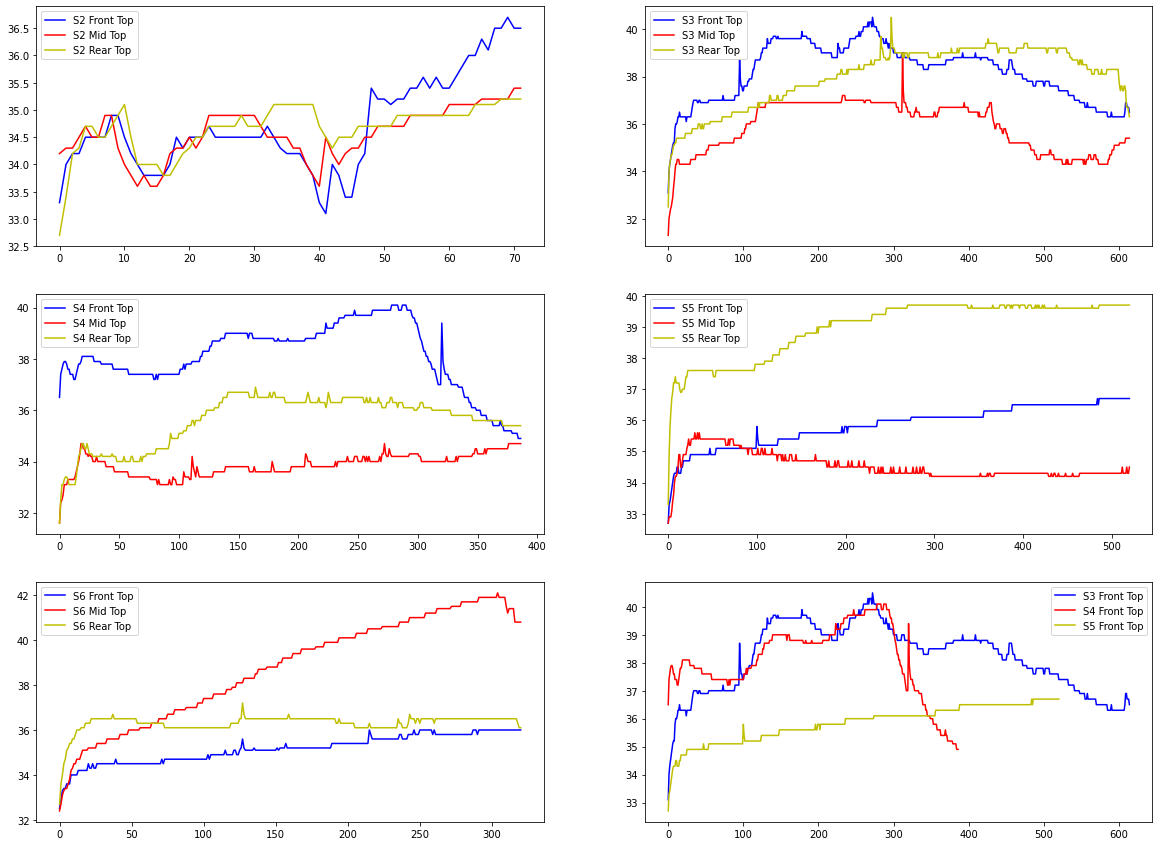

In [46]:
import io
S2 = pd.read_csv(io.BytesIO(uploaded['S2.csv']))
S3 = pd.read_csv(io.BytesIO(uploaded['S3.csv']))
S4 = pd.read_csv(io.BytesIO(uploaded['S4.csv']))
S5 = pd.read_csv(io.BytesIO(uploaded['S5.csv']))
S6 = pd.read_csv(io.BytesIO(uploaded['S6.csv']))

def csvtocolumns(dataset):
  FT = dataset.iloc[:,1]
  FM = dataset.iloc[:,2]
  FB = dataset.iloc[:,3]
  MT = dataset.iloc[:,4]
  MM = dataset.iloc[:,5]
  MB = dataset.iloc[:,6]
  RT = dataset.iloc[:,7]
  RM = dataset.iloc[:,8]
  RB = dataset.iloc[:,9]
  return FT, FM, FB, MT, MM, MB, RT, RM, RB

S2FT, S2FM, S2FB, S2MT, S2MM, S2MB, S2RT, S2RM, S2RB = csvtocolumns(S2)
S3FT, S3FM, S3FB, S3MT, S3MM, S3MB, S3RT, S3RM, S3RB = csvtocolumns(S3)
S4FT, S4FM, S4FB, S4MT, S4MM, S4MB, S4RT, S4RM, S4RB = csvtocolumns(S4)
S5FT, S5FM, S5FB, S5MT, S5MM, S5MB, S5RT, S5RM, S5RB = csvtocolumns(S5)
S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB = csvtocolumns(S6)

#print(f'Length of S2 {len(S2FT)} , {len(S2FM)} , {len(S2FB)} , {len(S2MT)} , {len(S2MM)} , {len(S2MB)} , {len(S2RT)} , {len(S2RM)} , {len(S2RB)}')
#print(f'Length of S2 {len(S3FT)} , {len(S3FM)} , {len(S3FB)} , {len(S3MT)} , {len(S3MM)} , {len(S3MB)} , {len(S3RT)} , {len(S3RM)} , {len(S3RB)}')
#print(f'Length of S2 {len(S4FT)} , {len(S4FM)} , {len(S4FB)} , {len(S4MT)} , {len(S4MM)} , {len(S4MB)} , {len(S4RT)} , {len(S4RM)} , {len(S4RB)}')
#print(f'Length of S2 {len(S5FT)} , {len(S5FM)} , {len(S5FB)} , {len(S5MT)} , {len(S5MM)} , {len(S5MB)} , {len(S5RT)} , {len(S5RM)} , {len(S5RB)}')
#print(f'Length of S2 {len(S6FT)} , {len(S6FM)} , {len(S6FB)} , {len(S6MT)} , {len(S6MM)} , {len(S6MB)} , {len(S6RT)} , {len(S6RM)} , {len(S6RB)}')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

ax[0,0].plot(S2FT, "b", label='S2 Front Top')
ax[0,0].plot(S2MT, "r", label='S2 Mid Top')
ax[0,0].plot(S2RT, "y", label='S2 Rear Top')
ax[0,0].legend()

ax[0,1].plot(S3FT, "b", label='S3 Front Top')
ax[0,1].plot(S3MT, "r", label='S3 Mid Top')
ax[0,1].plot(S3RT, "y", label='S3 Rear Top')
ax[0,1].legend()

ax[1,0].plot(S4FT, "b", label='S4 Front Top')
ax[1,0].plot(S4MT, "r", label='S4 Mid Top')
ax[1,0].plot(S4RT, "y", label='S4 Rear Top')
ax[1,0].legend()

ax[1,1].plot(S5FT, "b", label='S5 Front Top')
ax[1,1].plot(S5MT, "r", label='S5 Mid Top')
ax[1,1].plot(S5RT, "y", label='S5 Rear Top')
ax[1,1].legend()

ax[2,0].plot(S6FT, "b", label='S6 Front Top')
ax[2,0].plot(S6MT, "r", label='S6 Mid Top')
ax[2,0].plot(S6RT, "y", label='S6 Rear Top')
ax[2,0].legend()

ax[2,1].plot(S3FT, "b", label='S3 Front Top')
ax[2,1].plot(S4FT, "r", label='S4 Front Top')
ax[2,1].plot(S5FT, "y", label='S5 Front Top')
ax[2,1].legend()

plt.show()

In [47]:
print(f'Any Nan values in S2? {(S2.isnull().values.any())}')
print(f'Any Nan values in S3? {(S3.isnull().values.any())}')
print(f'Any Nan values in S4? {(S4.isnull().values.any())}')
print(f'Any Nan values in S5? {(S5.isnull().values.any())}')
print(f'Any Nan values in S6? {(S6.isnull().values.any())}')

S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB

print(f'Any Nan values in S6FT? {(S6FT.isnull().values.any())}')
print(f'Any Nan values in S6FM? {(S6FM.isnull().values.any())}')
print(f'Any Nan values in S6FB? {(S6FB.isnull().values.any())}')
print(f'Any Nan values in S6MT? {(S6MT.isnull().values.any())}')
print(f'Any Nan values in S6MM? {(S6MM.isnull().values.any())}')
print(f'Any Nan values in S6MB? {(S6MB.isnull().values.any())}')
print(f'Any Nan values in S6RT? {(S6RT.isnull().values.any())}')
print(f'Any Nan values in S6RM? {(S6RM.isnull().values.any())}')
print(f'Any Nan values in S6RB? {(S6RB.isnull().values.any())}')

Any Nan values in S2? False
Any Nan values in S3? False
Any Nan values in S4? False
Any Nan values in S5? False
Any Nan values in S6? True
Any Nan values in S6FT? False
Any Nan values in S6FM? False
Any Nan values in S6FB? True
Any Nan values in S6MT? False
Any Nan values in S6MM? False
Any Nan values in S6MB? False
Any Nan values in S6RT? False
Any Nan values in S6RM? False
Any Nan values in S6RB? False


**DEFINE THE SEQUENCE CREATING FUNCTION, CONVERT DATASET DATA TO ARRAY AND CREATE SEQUENCE**

In [48]:
def create_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix-4] # so that we can get the 3rd data of 0-7 sequence 
		# seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

S2FTA = pd.DataFrame.to_numpy(S2FT)
S2MTA = pd.DataFrame.to_numpy(S2MT)
S2RTA = pd.DataFrame.to_numpy(S2RT)
S2FMA = pd.DataFrame.to_numpy(S2FM)
S2MMA = pd.DataFrame.to_numpy(S2MM)
S2RMA = pd.DataFrame.to_numpy(S2RM)
S2FBA = pd.DataFrame.to_numpy(S2FB)
S2MBA = pd.DataFrame.to_numpy(S2MB)
S2RBA = pd.DataFrame.to_numpy(S2RB)

S3FTA = pd.DataFrame.to_numpy(S3FT)
S3MTA = pd.DataFrame.to_numpy(S3MT)
S3RTA = pd.DataFrame.to_numpy(S3RT)
S3FMA = pd.DataFrame.to_numpy(S3FM)
S3MMA = pd.DataFrame.to_numpy(S3MM)
S3RMA = pd.DataFrame.to_numpy(S3RM)
S3FBA = pd.DataFrame.to_numpy(S3FB)
S3MBA = pd.DataFrame.to_numpy(S3MB)
S3RBA = pd.DataFrame.to_numpy(S3RB)

S4FTA = pd.DataFrame.to_numpy(S4FT)
S4MTA = pd.DataFrame.to_numpy(S4MT)
S4RTA = pd.DataFrame.to_numpy(S4RT)
S4FMA = pd.DataFrame.to_numpy(S4FM)
S4MMA = pd.DataFrame.to_numpy(S4MM)
S4RMA = pd.DataFrame.to_numpy(S4RM)
S4FBA = pd.DataFrame.to_numpy(S4FB)
S4MBA = pd.DataFrame.to_numpy(S4MB)
S4RBA = pd.DataFrame.to_numpy(S4RB)

S5FTA = pd.DataFrame.to_numpy(S5FT)
S5MTA = pd.DataFrame.to_numpy(S5MT)
S5RTA = pd.DataFrame.to_numpy(S5RT)
S5FMA = pd.DataFrame.to_numpy(S5FM)
S5MMA = pd.DataFrame.to_numpy(S5MM)
S5RMA = pd.DataFrame.to_numpy(S5RM)
S5FBA = pd.DataFrame.to_numpy(S5FB)
S5MBA = pd.DataFrame.to_numpy(S5MB)
S5RBA = pd.DataFrame.to_numpy(S5RB)

S6FTA = pd.DataFrame.to_numpy(S6FT)
S6MTA = pd.DataFrame.to_numpy(S6MT)
S6RTA = pd.DataFrame.to_numpy(S6RT)
S6FMA = pd.DataFrame.to_numpy(S6FM)
S6MMA = pd.DataFrame.to_numpy(S6MM)
S6RMA = pd.DataFrame.to_numpy(S6RM)
S6FBA = pd.DataFrame.to_numpy(S6FB)
S6MBA = pd.DataFrame.to_numpy(S6MB)
S6RBA = pd.DataFrame.to_numpy(S6RB)

n_steps = 7

S2FTX, S2FTY = create_sequence(S2FTA, n_steps)
S2MTX, S2MTY = create_sequence(S2MTA, n_steps)
S2RTX, S2RTY = create_sequence(S2RTA, n_steps)
S2FMX, S2FMY = create_sequence(S2FMA, n_steps)
S2MMX, S2MMY = create_sequence(S2MMA, n_steps)
S2RMX, S2RMY = create_sequence(S2RMA, n_steps)
S2FBX, S2FBY = create_sequence(S2FBA, n_steps)
S2MBX, S2MBY = create_sequence(S2MBA, n_steps)
S2RBX, S2RBY = create_sequence(S2RBA, n_steps)

S3FTX, S3FTY = create_sequence(S3FTA, n_steps)
S3MTX, S3MTY = create_sequence(S3MTA, n_steps)
S3RTX, S3RTY = create_sequence(S3RTA, n_steps)
S3FMX, S3FMY = create_sequence(S3FMA, n_steps)
S3MMX, S3MMY = create_sequence(S3MMA, n_steps)
S3RMX, S3RMY = create_sequence(S3RMA, n_steps)
S3FBX, S3FBY = create_sequence(S3FBA, n_steps)
S3MBX, S3MBY = create_sequence(S3MBA, n_steps)
S3RBX, S3RBY = create_sequence(S3RBA, n_steps)

S4FTX, S4FTY = create_sequence(S4FTA, n_steps)
S4MTX, S4MTY = create_sequence(S4MTA, n_steps)
S4RTX, S4RTY = create_sequence(S4RTA, n_steps)
S4FMX, S4FMY = create_sequence(S4FMA, n_steps)
S4MMX, S4MMY = create_sequence(S4MMA, n_steps)
S4RMX, S4RMY = create_sequence(S4RMA, n_steps)
S4FBX, S4FBY = create_sequence(S4FBA, n_steps)
S4MBX, S4MBY = create_sequence(S4MBA, n_steps)
S4RBX, S4RBY = create_sequence(S4RBA, n_steps)

S5FTX, S5FTY = create_sequence(S5FTA, n_steps)
S5MTX, S5MTY = create_sequence(S5MTA, n_steps)
S5RTX, S5RTY = create_sequence(S5RTA, n_steps)
S5FMX, S5FMY = create_sequence(S5FMA, n_steps)
S5MMX, S5MMY = create_sequence(S5MMA, n_steps)
S5RMX, S5RMY = create_sequence(S5RMA, n_steps)
S5FBX, S5FBY = create_sequence(S5FBA, n_steps)
S5MBX, S5MBY = create_sequence(S5MBA, n_steps)
S5RBX, S5RBY = create_sequence(S5RBA, n_steps)

S6FTX, S6FTY = create_sequence(S6FTA, n_steps)
S6MTX, S6MTY = create_sequence(S6MTA, n_steps)
S6RTX, S6RTY = create_sequence(S6RTA, n_steps)
S6FMX, S6FMY = create_sequence(S6FMA, n_steps)
S6MMX, S6MMY = create_sequence(S6MMA, n_steps)
S6RMX, S6RMY = create_sequence(S6RMA, n_steps)
S6FBX, S6FBY = create_sequence(S6FBA, n_steps)
S6MBX, S6MBY = create_sequence(S6MBA, n_steps)
S6RBX, S6RBY = create_sequence(S6RBA, n_steps)

len(S2FTX)
len(S3FTX)

X_FT = np.concatenate((S2FTX, S3FTX, S4FTX, S5FTX, S6FTX), axis=0)
y_FT = np.concatenate((S2FTY, S3FTY, S4FTY, S5FTY, S6FTY), axis=0)
X_FM = np.concatenate((S2FMX, S3FMX, S4FMX, S5FMX, S6FMX), axis=0)
y_FM = np.concatenate((S2FMY, S3FMY, S4FMY, S5FMY, S6FMY), axis=0)
X_FB = np.concatenate((S2FBX, S3FBX, S4FBX, S5FBX, S6FBX), axis=0)
y_FB = np.concatenate((S2FBY, S3FBY, S4FBY, S5FBY, S6FBY), axis=0)

X_MT = np.concatenate((S2MTX, S3MTX, S4MTX, S5MTX, S6MTX), axis=0)
y_MT = np.concatenate((S2MTY, S3MTY, S4MTY, S5MTY, S6MTY), axis=0)
X_MM = np.concatenate((S2MMX, S3MMX, S4MMX, S5MMX, S6MMX), axis=0)
y_MM = np.concatenate((S2MMY, S3MMY, S4MMY, S5MMY, S6MMY), axis=0)
X_MB = np.concatenate((S2MBX, S3MBX, S4MBX, S5MBX, S6MBX), axis=0)
y_MB = np.concatenate((S2MBY, S3MBY, S4MBY, S5MBY, S6MBY), axis=0)

X_RT = np.concatenate((S2RTX, S3RTX, S4RTX, S5RTX, S6RTX), axis=0)
y_RT = np.concatenate((S2RTY, S3RTY, S4RTY, S5RTY, S6RTY), axis=0)
X_RM = np.concatenate((S2RMX, S3RMX, S4RMX, S5RMX, S6RMX), axis=0)
y_RM = np.concatenate((S2RMY, S3RMY, S4RMY, S5RMY, S6RMY), axis=0)
X_RB = np.concatenate((S2RBX, S3RBX, S4RBX, S5RBX, S6RBX), axis=0)
y_RB = np.concatenate((S2RBY, S3RBY, S4RBY, S5RBY, S6RBY), axis=0)

len(X_FT)

#plt.figure(figsize=(12, 10))
#plt.plot(y_FT, "b", label="y_FT")
#plt.plot(y_MT, "r", label="y_MT")
#plt.plot(y_RT, "y", label="y_RT")
#plt.legend()
#plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(y=y_FT, name="y_FT", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_MT, name="y_MT", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_RT, name="y_RT", line_shape='linear'))
fig.show()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(y=y_FM, name="y_FM", line_shape='linear'))
fig1.add_trace(go.Scatter(y=y_MM, name="y_MM", line_shape='linear'))
fig1.add_trace(go.Scatter(y=y_RM, name="y_RM", line_shape='linear'))
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(y=y_FB, name="y_FB", line_shape='linear'))
fig2.add_trace(go.Scatter(y=y_MB, name="y_MB", line_shape='linear'))
fig2.add_trace(go.Scatter(y=y_RB, name="y_RB", line_shape='linear'))
fig2.show()

In [5]:
X_FT[10:20]

array([[34.5, 34.2, 34. , 33.8, 33.8, 33.8, 33.8],
       [34.2, 34. , 33.8, 33.8, 33.8, 33.8, 34. ],
       [34. , 33.8, 33.8, 33.8, 33.8, 34. , 34.5],
       [33.8, 33.8, 33.8, 33.8, 34. , 34.5, 34.3],
       [33.8, 33.8, 33.8, 34. , 34.5, 34.3, 34.5],
       [33.8, 33.8, 34. , 34.5, 34.3, 34.5, 34.5],
       [33.8, 34. , 34.5, 34.3, 34.5, 34.5, 34.5],
       [34. , 34.5, 34.3, 34.5, 34.5, 34.5, 34.7],
       [34.5, 34.3, 34.5, 34.5, 34.5, 34.7, 34.5],
       [34.3, 34.5, 34.5, 34.5, 34.7, 34.5, 34.5]])

In [6]:
y_FT[10:20]

array([33.8, 33.8, 33.8, 33.8, 34. , 34.5, 34.3, 34.5, 34.5, 34.5])

**Predict Rear Bottom Sensor Values by the values given for the front top sensor**

**INPUT IS ASSIGNED TO MODEL INPUT VARIABLE**

**ADD THE THIRD DIMENSION FOR NUMBER OF FEATURES TO THE TRAIN INPUT.**

**THIS IS NECESSARY FOR CONV1D MODEL**



In [49]:
# define baseline model 1
# create model
def modelG(inp_shp):
  global model
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(inp_shp, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
  model.compile(optimizer=opt, loss='mae', metrics=['mae'])
  #model1.summary()


In [53]:
def datagenerator(n_sensors, Y_in, X_in1=np.array([]), X_in2=np.array([]), X_in3=np.array([]), X_in4=np.array([]), X_in5=np.array([]), X_in6=np.array([]), X_in7=np.array([])):
#def datagenerator(Y_in, X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7, n_sensors):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  InputsX = [X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7]
  InputsX = InputsX[0:n_sensors]
  X_in = np.concatenate([x for x in InputsX if x.size > 0], axis=1)

  #X_in = np.concatenate((X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)
  
  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)
#X_train_Input.shape

In [30]:
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(X_in1 = X_FT, X_in2 = X_FM, X_in3, X_in4, X_in5, X_in6, X_in7, Y_in = y_MB)
#X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(2, y_MB, X_FT, X_FM, np.array([]), np.array([]), np.array([]), np.array([]), np.array([]))

In [31]:
#X_train_Input.shape

(1128, 14, 1)

In [64]:
def evaldata(n_sensors, 
             traindata1 = None, traindata2 = None, traindata3 = None, traindata4 = None, 
             traindata5 = None, traindata6 = None, traindata7 = None, testdata = None, 
             X_in1=np.array([]), X_in2=np.array([]), X_in3=np.array([]), X_in4=np.array([]), 
             X_in5=np.array([]), X_in6=np.array([]), X_in7=np.array([]), Y_in=np.array([])):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(n_sensors, Y_in, X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7)
  
  history = model.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  #print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  #print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  #print(f'Test Loss (mae) is {test_loss[0]}')
  
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [86]:
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 7
n_sensors = 1

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF1 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1 = combo[0][0]
  vX1 = combo[0][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:]:
      continue
    print(f'kx1 = {kX1}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF1 = evaldata(n_sensors, X_in1=vX1, Y_in=vy, traindata1 = kX1, testdata = ky)
      TestLossTotal = resultsMF1[2] + TestLossTotal
      TrainLossTotal = resultsMF1[0] + TrainLossTotal
      ValLossTotal = resultsMF1[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF1["DATA_X"].append(kX1)
    my_dictMF1["DATA_y"].append(ky)
    my_dictMF1["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


kx1 = X_FT, ky = y_FM,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT and Test Data: y_FM
After 10 runs; Avg Training Loss (mae) is 1.4654292225837708, and Avg Validation Loss (mae) is 1.5014062166213988
After 10 runs; Avg Test Loss (mae) is 1.5254292488098145
kx1 = X_FT, ky = y_MT,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT and Test Data: y_MT
After 10 runs; Avg Training Loss (mae) is 1.8638123989105224, and Avg Validation Loss (mae) is 1.8799743056297302
After 10 runs; Avg Test Loss (mae) is 1.8553394198417663
kx1 = X_FT, ky = y_MM,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT and Test Data: y_MM
After 10 runs; Avg Training Loss (mae) is 1

In [87]:
CombResults1 = pd.DataFrame.from_dict(my_dictMF1)
CombResultsSorted1 = CombResults1.sort_values(by=['Test Loss'])
CombResultsSorted1.to_csv('CombResultsSorted1.csv')
CombResultsSorted1
files.download("CombResultsSorted1.csv")
fig = px.box(CombResultsSorted1, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
CombResultsSortedgrouped1 = CombResultsSorted1.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF1 = CombResultsSortedgrouped1.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF1.to_csv('CombResultsSortedgroupedsortedMF1.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF1.csv")
CombResultsSortedgroupedsortedMF1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_RB,1.176321
X_MM,1.251046
X_RM,1.265555
X_FM,1.299914
X_RT,1.420165
X_MB,1.445103
X_MT,1.583413
X_FT,1.694031


In [66]:
#Combinations of 2 Sensors, therefore 14 features, 14 inputs
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 14
n_sensors = 2

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF2 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1, kX2 = combo[0][0], combo[1][0]
  vX1, vX2 = combo[0][1], combo[1][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF2 = evaldata(n_sensors, X_in1=vX1, X_in2=vX2, Y_in=vy, traindata1 = kX1, traindata2 = kX2, testdata = ky)
      TestLossTotal = resultsMF2[2] + TestLossTotal
      TrainLossTotal = resultsMF2[0] + TrainLossTotal
      ValLossTotal = resultsMF2[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}, {kX2} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF2["DATA_X"].append(kX1 + kX2)
    my_dictMF2["DATA_y"].append(ky)
    my_dictMF2["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


kx1 = X_FT, kx2 = X_FM, ky = y_MT,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM and Test Data: y_MT
After 10 runs; Avg Training Loss (mae) is 1.3490669012069703, and Avg Validation Loss (mae) is 1.460232388973236
After 10 runs; Avg Test Loss (mae) is 1.4638543128967285
kx1 = X_FT, kx2 = X_FM, ky = y_MM,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM and Test Data: y_MM
After 10 runs; Avg Training Loss (mae) is 0.9367406129837036, and Avg Validation Loss (mae) is 0.9588613748550415
After 10 runs; Avg Test Loss (mae) is 0.9495458245277405
kx1 = X_FT, kx2 = X_FM, ky = y_MB,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM and Test D

In [67]:
CombResults2 = pd.DataFrame.from_dict(my_dictMF2)
CombResultsSorted2 = CombResults2.sort_values(by=['Test Loss'])
CombResultsSorted2.to_csv('CombResultsSorted2.csv')
CombResultsSorted2
files.download("CombResultsSorted2.csv")
fig = px.box(CombResultsSorted2, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
CombResultsSortedgrouped2 = CombResultsSorted2.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF2 = CombResultsSortedgrouped2.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF2.to_csv('CombResultsSortedgroupedsortedMF2.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF2.csv")
CombResultsSortedgroupedsortedMF2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_MTX_RB,0.933262
X_MTX_RM,0.939098
X_MTX_RT,0.968941
X_FTX_MM,0.977934
X_MMX_RT,0.998461
X_FTX_RM,1.008880
X_MMX_RM,1.031789
X_FMX_RT,1.048835
X_FTX_RB,1.049959


In [70]:
#Combinations of 3 Sensors, therefore 21 features, 21 inputs
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 21
n_sensors = 3

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF3 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1, kX2, kX3 = combo[0][0], combo[1][0], combo[2][0]
  vX1, vX2, vX3 = combo[0][1], combo[1][1], combo[2][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, ky = {ky}')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF3 = evaldata(n_sensors, X_in1=vX1, X_in2=vX2, X_in3=vX3, Y_in=vy, traindata1 = kX1, traindata2 = kX2, traindata3 = kX3, testdata = ky)
      TestLossTotal = resultsMF3[2] + TestLossTotal
      TrainLossTotal = resultsMF3[0] + TrainLossTotal
      ValLossTotal = resultsMF3[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}, {kX2}, {kX3} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF3["DATA_X"].append(kX1 + kX2 + kX3)
    my_dictMF3["DATA_y"].append(ky)
    my_dictMF3["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, ky = y_MM
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT and Test Data: y_MM
After 10 runs; Avg Training Loss (mae) is 0.9385205566883087, and Avg Validation Loss (mae) is 0.8020997226238251
After 10 runs; Avg Test Loss (mae) is 0.8069062173366547
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, ky = y_MB
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT and Test Data: y_MB
After 10 runs; Avg Training Loss (mae) is 0.922955983877182, and Avg Validation Loss (mae) is 1.0008366465568543
After 10 runs; Avg Test Loss (mae) is 1.0209195554256438
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, ky = y_RT
*****************************************************************************************************************************
Evaluat

In [71]:
CombResults3 = pd.DataFrame.from_dict(my_dictMF3)
CombResultsSorted3 = CombResults3.sort_values(by=['Test Loss'])
CombResultsSorted3.to_csv('CombResultsSorted3.csv')
CombResultsSorted3
files.download("CombResultsSorted3.csv")
fig = px.box(CombResultsSorted3, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
CombResultsSortedgrouped3 = CombResultsSorted3.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF3 = CombResultsSortedgrouped3.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF3.to_csv('CombResultsSortedgroupedsortedMF3.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF3.csv")
CombResultsSortedgroupedsortedMF3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_FTX_MTX_RM,0.745916
X_FTX_MMX_RM,0.787207
X_FTX_MTX_RT,0.798956
X_FTX_MMX_RT,0.801899
X_FMX_MTX_RM,0.839030
X_FTX_MMX_RB,0.887072
X_FTX_MTX_RB,0.895872
X_FMX_MTX_RT,0.903266
X_MTX_RTX_RB,0.930091


In [74]:
#Combinations of 4 Sensors, therefore 28 features, 28 inputs
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 28
n_sensors = 4

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF4 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1, kX2, kX3, kX4 = combo[0][0], combo[1][0], combo[2][0], combo[3][0]
  vX1, vX2, vX3, vX4 = combo[0][1], combo[1][1], combo[2][1], combo[3][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF4 = evaldata(n_sensors, X_in1=vX1, X_in2=vX2, X_in3=vX3, X_in4=vX4, Y_in=vy, traindata1 = kX1, traindata2 = kX2, traindata3 = kX3, traindata4 = kX4, testdata = ky)
      TestLossTotal = resultsMF4[2] + TestLossTotal
      TrainLossTotal = resultsMF4[0] + TrainLossTotal
      ValLossTotal = resultsMF4[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}, {kX2}, {kX3}, {kX4} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF4["DATA_X"].append(kX1 + kX2 + kX3 + kX4)
    my_dictMF4["DATA_y"].append(ky)
    my_dictMF4["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, ky = y_MB,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM and Test Data: y_MB
After 10 runs; Avg Training Loss (mae) is 0.8304283499717713, and Avg Validation Loss (mae) is 1.207629179954529
After 10 runs; Avg Test Loss (mae) is 1.1940179347991944
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, ky = y_RT,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM and Test Data: y_RT
After 10 runs; Avg Training Loss (mae) is 1.3682222843170166, and Avg Validation Loss (mae) is 1.4621190190315247
After 10 runs; Avg Test Loss (mae) is 1.4655804991722108
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, ky = y_RM,
**********************************************************************************

In [75]:
CombResults4 = pd.DataFrame.from_dict(my_dictMF4)
CombResultsSorted4 = CombResults4.sort_values(by=['Test Loss'])
CombResultsSorted4.to_csv('CombResultsSorted4.csv')
CombResultsSorted4
files.download("CombResultsSorted4.csv")
fig = px.box(CombResultsSorted4, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
CombResultsSortedgrouped4 = CombResultsSorted4.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF4 = CombResultsSortedgrouped4.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF4.to_csv('CombResultsSortedgroupedsortedMF4.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF4.csv")
CombResultsSortedgroupedsortedMF4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_FTX_MTX_MBX_RT,0.659137
X_FTX_MTX_MBX_RM,0.661560
X_FTX_MTX_MMX_RT,0.698041
X_FTX_FMX_MTX_RT,0.698338
X_FTX_FMX_MTX_RM,0.721115
...,...
X_FTX_RTX_RMX_RB,1.130918
X_MTX_MMX_MBX_RB,1.152737
X_MBX_RTX_RMX_RB,1.203025


In [77]:
#Combinations of 5 Sensors, therefore 35 features, 35 inputs
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 35
n_sensors = 5

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF5 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1, kX2, kX3, kX4, kX5 = combo[0][0], combo[1][0], combo[2][0], combo[3][0], combo[4][0]
  vX1, vX2, vX3, vX4, vX5 = combo[0][1], combo[1][1], combo[2][1], combo[3][1], combo[4][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:] or ky[-2:] == kX5[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, kx5 = {kX5}, ky = {ky}')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF5 = evaldata(n_sensors, X_in1=vX1, X_in2=vX2, X_in3=vX3, X_in4=vX4, X_in5=vX5, Y_in=vy, traindata1 = kX1, traindata2 = kX2, traindata3 = kX3, traindata4 = kX4, traindata5 = kX5, testdata = ky)
      TestLossTotal = resultsMF5[2] + TestLossTotal
      TrainLossTotal = resultsMF5[0] + TrainLossTotal
      ValLossTotal = resultsMF5[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}, {kX2}, {kX3}, {kX4}, {kX5} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF5["DATA_X"].append(kX1 + kX2 + kX3 + kX4 + kX5)
    my_dictMF5["DATA_y"].append(ky)
    my_dictMF5["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, ky = y_RT
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM, X_MB and Test Data: y_RT
After 10 runs; Avg Training Loss (mae) is 1.3799450993537903, and Avg Validation Loss (mae) is 1.607702624797821
After 10 runs; Avg Test Loss (mae) is 1.5894007563591004
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, ky = y_RM
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM, X_MB and Test Data: y_RM
After 10 runs; Avg Training Loss (mae) is 1.000454878807068, and Avg Validation Loss (mae) is 1.019024622440338
After 10 runs; Avg Test Loss (mae) is 1.0090260624885559
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, ky = y_RB
***************************************

In [78]:
CombResults5 = pd.DataFrame.from_dict(my_dictMF5)
CombResultsSorted5 = CombResults5.sort_values(by=['Test Loss'])
CombResultsSorted5.to_csv('CombResultsSorted5.csv')
CombResultsSorted5
files.download("CombResultsSorted5.csv")
fig = px.box(CombResultsSorted5, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
CombResultsSortedgrouped5 = CombResultsSorted5.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF5 = CombResultsSortedgrouped5.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF5.to_csv('CombResultsSortedgroupedsortedMF5.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF5.csv")
CombResultsSortedgroupedsortedMF5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_FTX_FMX_MTX_MBX_RM,0.647723
X_FTX_FMX_MTX_MMX_RT,0.659906
X_FTX_MTX_MBX_RTX_RB,0.676229
X_FTX_FMX_MTX_MBX_RT,0.677411
X_FTX_MTX_MMX_MBX_RT,0.701170
X_FTX_FMX_MTX_RTX_RM,0.701201
X_FTX_MTX_RTX_RMX_RB,0.701829
X_FTX_MTX_MBX_RTX_RM,0.703197
X_FTX_MTX_MMX_RTX_RM,0.718557


In [80]:
#Combinations of 6 Sensors, therefore 42 features, 42 inputs
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 42
n_sensors = 6

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF6 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1, kX2, kX3, kX4, kX5, kX6 = combo[0][0], combo[1][0], combo[2][0], combo[3][0], combo[4][0], combo[5][0]
  vX1, vX2, vX3, vX4, vX5, vX6 = combo[0][1], combo[1][1], combo[2][1], combo[3][1], combo[4][1], combo[5][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:] or ky[-2:] == kX5[-2:] or ky[-2:] == kX6[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, kx5 = {kX5}, kx6 = {kX6}, ky = {ky}')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF6 = evaldata(n_sensors, X_in1=vX1, X_in2=vX2, X_in3=vX3, X_in4=vX4, X_in5=vX5, X_in6=vX6, Y_in=vy, traindata1 = kX1, traindata2 = kX2, traindata3 = kX3, traindata4 = kX4, traindata5 = kX5, traindata6 = kX6, testdata = ky)
      TestLossTotal = resultsMF6[2] + TestLossTotal
      TrainLossTotal = resultsMF6[0] + TrainLossTotal
      ValLossTotal = resultsMF6[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}, {kX2}, {kX3}, {kX4}, {kX5}, {kX6} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF6["DATA_X"].append(kX1 + kX2 + kX3 + kX4 + kX5 + kX6)
    my_dictMF6["DATA_y"].append(ky)
    my_dictMF6["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, kx6 = X_RT, ky = y_RM
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM, X_MB, X_RT and Test Data: y_RM
After 10 runs; Avg Training Loss (mae) is 0.8088268071413041, and Avg Validation Loss (mae) is 1.0269912481307983
After 10 runs; Avg Test Loss (mae) is 1.007518357038498
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, kx6 = X_RT, ky = y_RB
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM, X_MB, X_RT and Test Data: y_RB
After 10 runs; Avg Training Loss (mae) is 0.7061010360717773, and Avg Validation Loss (mae) is 0.6179820418357849
After 10 runs; Avg Test Loss (mae) is 0.6398127973079681
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, kx6 = X_RM,

In [81]:
CombResults6 = pd.DataFrame.from_dict(my_dictMF6)
CombResultsSorted6 = CombResults6.sort_values(by=['Test Loss'])
CombResultsSorted6.to_csv('CombResultsSorted6.csv')
CombResultsSorted6
files.download("CombResultsSorted6.csv")
fig = px.box(CombResultsSorted6, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
CombResultsSortedgrouped6 = CombResultsSorted6.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF6 = CombResultsSortedgrouped6.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF6.to_csv('CombResultsSortedgroupedsortedMF6.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF6.csv")
CombResultsSortedgroupedsortedMF6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_FTX_FMX_MTX_MBX_RTX_RB,0.609966
X_FTX_FMX_MTX_MBX_RMX_RB,0.645761
X_FTX_FMX_MTX_MBX_RTX_RM,0.663264
X_FTX_MTX_MMX_MBX_RTX_RB,0.681028
X_FTX_FMX_MTX_RTX_RMX_RB,0.692575
X_FTX_MTX_MBX_RTX_RMX_RB,0.711900
X_FTX_FMX_MTX_MMX_RTX_RB,0.716377
X_FTX_MTX_MMX_MBX_RTX_RM,0.721396
X_FTX_FMX_MTX_MMX_RTX_RM,0.727144


In [83]:
#Combinations of 7 Sensors, therefore 49 features, 49 inputs
TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 49
n_sensors = 7

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF7 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1, kX2, kX3, kX4, kX5, kX6, kX7 = combo[0][0], combo[1][0], combo[2][0], combo[3][0], combo[4][0], combo[5][0], combo[6][0]
  vX1, vX2, vX3, vX4, vX5, vX6, vX7 = combo[0][1], combo[1][1], combo[2][1], combo[3][1], combo[4][1], combo[5][1], combo[6][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:] or ky[-2:] == kX5[-2:] or ky[-2:] == kX6[-2:] or ky[-2:] == kX7[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, kx5 = {kX5}, kx6 = {kX6}, kx7 = {kX7}, ky = {ky}')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF7 = evaldata(n_sensors, X_in1=vX1, X_in2=vX2, X_in3=vX3, X_in4=vX4, X_in5=vX5, X_in6=vX6, X_in7=vX7, Y_in=vy, traindata1 = kX1, traindata2 = kX2, traindata3 = kX3, traindata4 = kX4, traindata5 = kX5, traindata6 = kX6, traindata7 = kX7, testdata = ky)
      TestLossTotal = resultsMF7[2] + TestLossTotal
      TrainLossTotal = resultsMF7[0] + TrainLossTotal
      ValLossTotal = resultsMF7[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}, {kX2}, {kX3}, {kX4}, {kX5}, {kX6}, {kX7} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')

    my_dictMF7["DATA_X"].append(kX1 + kX2 + kX3 + kX4 + kX5 + kX6 + kX7)
    my_dictMF7["DATA_y"].append(ky)
    my_dictMF7["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)
    model.load_weights('model.h5')


kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, kx6 = X_RT, kx7 = X_RM, ky = y_RB
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM, X_MB, X_RT, X_RM and Test Data: y_RB
After 10 runs; Avg Training Loss (mae) is 0.6094319194555282, and Avg Validation Loss (mae) is 0.6623960733413696
After 10 runs; Avg Test Loss (mae) is 0.6527139872312546
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT, kx4 = X_MM, kx5 = X_MB, kx6 = X_RT, kx7 = X_RB, ky = y_RM
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_FM, X_MT, X_MM, X_MB, X_RT, X_RB and Test Data: y_RM
After 10 runs; Avg Training Loss (mae) is 0.6573131561279297, and Avg Validation Loss (mae) is 0.6272068113088608
After 10 runs; Avg Test Loss (mae) is 0.6281053274869919
kx1 = X_FT, kx2 = X_FM, kx3 = X_MT

In [84]:
CombResults7 = pd.DataFrame.from_dict(my_dictMF7)
CombResultsSorted7 = CombResults7.sort_values(by=['Test Loss'])
CombResultsSorted7.to_csv('CombResultsSorted7.csv')
CombResultsSorted7
files.download("CombResultsSorted7.csv")
fig = px.box(CombResultsSorted7, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
CombResultsSortedgrouped7 = CombResultsSorted7.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF7 = CombResultsSortedgrouped7.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF7.to_csv('CombResultsSortedgroupedsortedMF7.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF7.csv")
CombResultsSortedgroupedsortedMF7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Test Loss
DATA_X,
X_FTX_FMX_MTX_MBX_RTX_RMX_RB,0.550157
X_FTX_FMX_MTX_MMX_MBX_RTX_RB,0.628105
X_FTX_FMX_MTX_MMX_MBX_RTX_RM,0.652714
X_FTX_FMX_MTX_MMX_MBX_RMX_RB,0.719165
X_FTX_FMX_MTX_MMX_RTX_RMX_RB,0.766009
X_FTX_MTX_MMX_MBX_RTX_RMX_RB,0.837501
X_FTX_FMX_MMX_MBX_RTX_RMX_RB,1.282294
X_FMX_MTX_MMX_MBX_RTX_RMX_RB,1.592832
